# Исследование данных о российском кинопрокате



## Открываем два файла с данными и объединим их в один датафрейм. 

Объединим данные таким образом, чтобы все объекты из второго датасета обязательно вошли в получившийся датафрейм.

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
import seaborn as sns

In [2]:
pth1 = '1.csv'
pth2 = 'С:/1.csv'
pth3 = '2.csv'
pth4 = 'С:/2.csv'

In [3]:
if os.path.exists(pth1):
    df1=pd.read_csv(pth1)
    df2=pd.read_csv(pth3)
elif os.path.exists(pth2):
    df1=pd.read_csv(pth2)
    df2=pd.read_csv(pth4)
else:
    print('что то пошло не так...')

Рассмотрим обе таблицы:

In [4]:
display(df1.info())
df1.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

None

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"


In [5]:
display(df2.info())
df2.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


None

,puNumber,box_office
0,111000113,2450.0
1,111000115,61040.0
2,111000116,153030013.4


Обьединим обе таблицы. Для этого приведем колонку, по которой будет объединение к отдному типу. Целесообразнее выбрать тип `int`. Сперва найдем значения, которые привели к типу "объект" в первой таблице.

In [6]:
np.set_printoptions(threshold=sys.maxsize) # вывод с максимальным размером.
print(df1['puNumber'].unique())

['221048915' '111013716' '221038416' '221026916' '221030815' '111013816'
 '111007013' '221074614' '121011416' '111019114' '221031416' '111019014'
 '221011415' '121003106' '221008812' '111014916' '111007513' '111027914'
 '111003616' '111003716' '111003316' '121015405' '111007413' '111003416'
 '111003516' '221072614' '221012515' '111024314' '221012815' '111014116'
 '111019314' '111013916' '224020512' '221006016' '221011915' '121006706'
 '221009314' '221012015' '111007213' '111010313' '221005015' '221004616'
 '121019205' '121000606' '211044013' '111011313' '111006415' '111029814'
 '221058014' '121004205' '111005815' '221015415' '111010513' '111010813'
 '221004416' '111010413' '111029514' '111010213' '221072814' '111011613'
 '224029312' '111005515' '111006515' '111011713' '111005915' '111011113'
 '111011013' '221005215' '111010913' '111006015' '111011813' '111012313'
 '121006606' '111006715' '111012013' '111012213' '111011913' '111026014'
 '111012413' '126003116' '221058214' '111013113' '1

In [7]:
df1[~df1['puNumber'].str.isdigit()]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
804,Паранормальный Якутск,111004112,2012-08-24T12:00:00.000Z,Художественный,ИП Тимофеев К.П.,Россия,К.Тимофеев,NaN,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,NaN,NaN
1797,Курбан-роман. (История с жертвой),нет,2014-05-15T12:00:00.000Z,Художественный,"ФОНД ""ИННОВАЦИЯ""",Россия,С.Юзеев,М.Галицкая,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df1.loc[804, 'puNumber'] = df1.loc[804, 'puNumber'].strip() # убираем значение с пробелами
df1.loc[1797, 'puNumber'] = '000000000' # заменяем на 0 значение "нет"

df1['puNumber'] = pd.to_numeric(df1['puNumber'])

Определили ошибки. Устранили пробел в начале значения строки 804, значение "нет" строки 1797 заменили на 000000000

In [9]:
print('df1 type:',df1['puNumber'].dtype)
print('df2 type:',df2['puNumber'].dtype)

df1 type: int64
df2 type: int64


Столбцы `puNumber`, которым можно обьединить таблицы df1 и df2 имеют одинаковый тип.  
Теперь можно обьединить: Количество строк в таблицах разное, это говорит о том, что не по всем строкам есть информация о прокате, по этому логичнее в таблицу с характеристиками фильмов добавить таблицу с покатами фильмов. Если обьединять будем наоборот, то можем потерять много информации из таблицы с характеристиками.

In [10]:
data = df1.merge(df2, on='puNumber', how='left')
data.head(3)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN


## Предобработка данных

### Проверяем типы данных в датафрейме и преобразуйте их там, где это необходимо.

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   int64  
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

Очевидно, что `show_start_date` должен иметь тип datatime, `ratings` - float64

In [12]:
data['show_start_date'] = pd.to_datetime(data['show_start_date'], format='%Y-%m-%d')

In [13]:
print(data['ratings'].unique())

['7.2' '6.6' '6.8' '7.7' '8.3' '8.0' '7.8' '8.1' '7.1' '6.0' '7.4' '5.8'
 '8.7' '6.3' '6.9' '5.0' '4.3' '7.3' '7.0' '6.4' nan '8.2' '7.5' '6.7'
 '7.9' '5.9' '6.2' '5.6' '6.5' '2.4' '7.6' '6.1' '8.6' '8.5' '8.8' '5.5'
 '5.1' '5.7' '5.4' '99%' '4.4' '4.5' '5.3' '4.1' '8.4' '2.6' '3.8' '4.6'
 '4.8' '4.0' '3.0' '1.6' '4.2' '5.2' '4.7' '4.9' '3.9' '2.7' '3.3' '2.9'
 '28%' '3.7' '1.4' '3.1' '97%' '3.5' '3.2' '2.8' '1.5' '2.1' '2.5' '9.2'
 '3.4' '1.1' '3.6' '83%' '64%' '91%' '94%' '62%' '79%' '90%' '19%' '88%'
 '1.0' '89%' '1.3' '1.9' '1.8' '1.2' '1.7' '9.0' '98%' '8.9' '9.1']


In [14]:
data['ratings'] = data['ratings'].str.replace('%', '')
df = data

In [15]:

data['ratings'] = data['ratings'].replace(
    {'99':'9.9', '83': '8.3', '64':'6.4', '91':'9.1', '94':'9.4', 
     '62':'6.2', '79':'7.9', '28':'2.8', '97':'9.7', '90':'9.0', '19':'1.9', 
     '88':'8.8', '89':'8.9', '98':'9.8'}
)
df['ratings'] = pd.to_numeric(data['ratings'])
df['ratings'].unique()

array([7.2, 6.6, 6.8, 7.7, 8.3, 8. , 7.8, 8.1, 7.1, 6. , 7.4, 5.8, 8.7,
       6.3, 6.9, 5. , 4.3, 7.3, 7. , 6.4, nan, 8.2, 7.5, 6.7, 7.9, 5.9,
       6.2, 5.6, 6.5, 2.4, 7.6, 6.1, 8.6, 8.5, 8.8, 5.5, 5.1, 5.7, 5.4,
       9.9, 4.4, 4.5, 5.3, 4.1, 8.4, 2.6, 3.8, 4.6, 4.8, 4. , 3. , 1.6,
       4.2, 5.2, 4.7, 4.9, 3.9, 2.7, 3.3, 2.9, 2.8, 3.7, 1.4, 3.1, 9.7,
       3.5, 3.2, 1.5, 2.1, 2.5, 9.2, 3.4, 1.1, 3.6, 9.1, 9.4, 9. , 1.9,
       1. , 8.9, 1.3, 1.8, 1.2, 1.7, 9.8])

Колонку `rating` привели к привычному долевому значению (10/10) и уберали %.

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  7486 non-null   object             
 1   puNumber               7486 non-null   int64              
 2   show_start_date        7486 non-null   datetime64[ns, UTC]
 3   type                   7486 non-null   object             
 4   film_studio            7468 non-null   object             
 5   production_country     7484 non-null   object             
 6   director               7477 non-null   object             
 7   producer               6918 non-null   object             
 8   age_restriction        7486 non-null   object             
 9   refundable_support     332 non-null    float64            
 10  nonrefundable_support  332 non-null    float64            
 11  budget                 332 non-null    float64          

### Изучим пропуски в датафрейме


In [17]:
data.isna().sum()

title                       0
puNumber                    0
show_start_date             0
type                        0
film_studio                18
production_country          2
director                    9
producer                  568
age_restriction             0
refundable_support       7154
nonrefundable_support    7154
budget                   7154
financing_source         7154
ratings                   967
genres                    976
box_office               4328
dtype: int64

In [18]:
display(data.loc[data['film_studio'].isna()==True].head(18)) 

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1293,Stars in Shorts,121011114,2014-06-03 12:00:00+00:00,Художественный,NaN,"США, Великобритания","Роберт Фестингер, Руперт Френд, Джей Камен, Ни...","Татьяна Келли, Роберта Мунро, Руперт Френд, До...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.3,комедия,NaN
4441,Мульт личности. Выпуск 5,214000410,2010-01-25 12:00:00+00:00,Художественный,NaN,NaN,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,4.0,"мультфильм,комедия",NaN
6105,Значит любит,111013818,2018-08-10 12:00:00+00:00,Художественный,NaN,Россия,А.Краевский,Е.Щербакова,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6181,Несейка. Младшая дочь,112007018,2018-09-01 12:00:00+00:00,Документальный,NaN,Россия,В.Марин,"Д.Якунин, Ф.Абрютин, О.Филонова",«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6379,Ян Антонышев,112011818,2018-11-15 12:00:00+00:00,Документальный,NaN,Россия,Е.Окопная,Е.Герасимов,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6380,Ян Антонышев,112011918,2018-11-15 12:00:00+00:00,Документальный,NaN,Россия,Е.Окопная,Е.Герасимов,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6399,Доживем до каникул?..,111021918,2018-11-15 12:00:00+00:00,Художественный,NaN,Россия,Я.Хальпукова (псевдоним Яна Мартынец),Я.Хальпукова (псевдоним Яна Мартынец),«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,41225.0
6485,До и После,112014418,2018-12-05 12:00:00+00:00,Документальный,NaN,Россия,А.Новокреповская,А.Новокреповская,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.9,"драма,криминал,детектив",NaN
6494,Калмыцкий геше Нгаванг Вангьял,113002018,2018-12-05 12:00:00+00:00,Научно-популярный,NaN,Россия,И.Долгина,И.Долгина,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6497,Мой папа Чингисхан,112014918,2018-12-06 12:00:00+00:00,Документальный,NaN,Россия,А.Сайфуллина,А.Сайфуллина,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
data.loc[1293,'film_studio'] = 'Бисквит пикчерс, Контемптайбл интертеймант, Миссион Фильм'
data.loc[4441,'film_studio'] = 'Концепт спейс, Пространство идей'

Остальные пропуски обьяснимы тем, что фильмы сняты без студии. По этому их целесообразнее оставить. 

In [20]:
display(data.loc[data['production_country'].isna()==True].head(2)) 

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
3186,"Детский юмористический киножурнал ""Ералаш. Ну ...",111001216,2016-02-09 12:00:00+00:00,Художественный,"ООО ""Продюсерский центр ЕРАЛАШ""",NaN,"Р.Светлов, И.Магитон, А.Арутюнян, Л.Мирский, А...","ООО ""Продюсерский центр ЕРАЛАШ""",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.2,"детский,комедия",194527.0
4441,Мульт личности. Выпуск 5,214000410,2010-01-25 12:00:00+00:00,Художественный,"Концепт спейс, Пространство идей",NaN,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,4.0,"мультфильм,комедия",NaN


In [21]:
data.loc[[3186,4441],'production_country'] = 'Россия'

Пропуски в колонки `production_country` заменены. Обусловлено это названием фильма.

In [22]:
display(data.loc[data['director'].isna()==True].head(9))

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
764,"Три звезды. Концерт в Waldbuhne Theater, Берли...",126003512,2012-12-04 12:00:00+00:00,Прочие,Райзинг Алтернатив,Великобритания,NaN,Вальдбюне Театр,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,44350.0
1735,Помпеи. Британский музей,126003413,2013-09-11 12:00:00+00:00,Прочие,"МортуСкрин, Британский музей",Великобритания,NaN,Британский музей,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3840,Зур концерт (Большой концерт).,217027010,2010-06-24 12:00:00+00:00,Художественный,"ООО ""Барс Рекордс""",Россия,NaN,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4052,"Ганс Сэйфуллин ""Авылым чишмэлэре. Ганс Сэйфулл...",217017310,2010-04-22 12:00:00+00:00,Художественный,"ООО ""Барс-Рекордс""",Россия,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4298,Изге Вэли (Святой Валентин),217020610,2010-05-20 12:00:00+00:00,Художественный,"ООО ""Барс Рекордс""",Россия,NaN,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4415,Bon Jovi. The Circle Tour,126001710,2010-11-11 12:00:00+00:00,Прочие,Эншутц Интертейнмент Груп,США,NaN,Эншутц Интертейнмент Груп,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.9,"концерт,музыка",NaN
4441,Мульт личности. Выпуск 5,214000410,2010-01-25 12:00:00+00:00,Художественный,"Концепт спейс, Пространство идей",Россия,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,4.0,"мультфильм,комедия",NaN
4923,Георг Фридрих Гендель. Мессия. Оратория. Корол...,126001111,2011-04-25 12:00:00+00:00,Прочие,Опус Арт,Великобритания,NaN,Короевский колледж Кембриджа,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4942,Питер Гэбриэл и New Blood Orchestra 3D,126002711,2011-11-11 12:00:00+00:00,Прочие,Омниверс Визион,Великобритания,NaN,Омниверс Визион,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,6.7,"концерт,музыка",NaN


In [23]:
data.loc[1735,'director'] = 'Джон Руни'
data.loc[4441,'director'] = 'Василий Пичул, Юрий Владовский'

Пропуски обусловлены отсутствием директора у записей музыкальных произведений.

In [24]:
display(data.loc[data['producer'].isna()==True].head(3))


,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
5,Остановился поезд,111013816,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.7,драма,NaN
6,Любовь и голуби,111007013,2013-10-18 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.3,"мелодрама,комедия",2700.0


Пропуски в столбце `producer`  фильмов СССР обусловлены тем, что в СССР, в отличии от западных стран, финансирование кинематографа шло через Государственный комитет по кинематографии (орган при Совете министров СССР). Для распоряжения выделенными финансами, а затем предоставления отчета о тратах и существовала должность директора кинокартины. Сейчас эта должность, в соответствии с международной практикой, называется исполнительный продюсер. Следовательно пропуски можно заменить на директора картины. Что бы остальные пропуски заполнить необходимо искать информацию про каждый фильм, что является неэффективным занятием.

In [25]:
for t in data['production_country'].unique():
    data.loc[('СССР' in data['production_country']) & (data['producer'].isna()), 'producer'] = data['director']
display(data.loc[data['producer'].isna()==True].head(3))
print('Число пропусков: ',data['producer'].isna().sum())

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
5,Остановился поезд,111013816,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.7,драма,NaN
6,Любовь и голуби,111007013,2013-10-18 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.3,"мелодрама,комедия",2700.0


Число пропусков:  568


In [26]:
display(data.loc[data['budget'].isna()==True].head(3))
print('Число пропусков: ',data['budget'].isna().sum())

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN


Число пропусков:  7154


Столбец `budget` включает в себя полный объём государственной поддержки. Если значения отсутствуют и одновременно в столбцах `nonrefundable_support` и `refundable_support`, то скорее всего Государством эти фильмы не спонсировались. Поэтому смело обнуляем пропуски во всех этих колонках.

In [27]:
data[['budget', 'refundable_support','nonrefundable_support']] = \
data[['budget', 'refundable_support','nonrefundable_support']].fillna(0)

In [28]:
data.loc[data['budget']!=0]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1281,Пока еще жива,111005313,2013-10-11 12:00:00+00:00,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",«16+» - для детей старше 16 лет,0.0,26500000.0,79411900.0,Министерство культуры,8.1,"драма,мелодрама",3.653536e+05
1448,Бесславные придурки,111003314,2014-03-28 12:00:00+00:00,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,А.Якимчук,А.Тютрюмов,«12+» - для детей старше 12 лет,0.0,26000000.0,37142857.0,Министерство культуры,NaN,NaN,2.814000e+04
1498,Невидимки,111004213,2013-09-10 12:00:00+00:00,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",«12+» - для детей старше 12 лет,0.0,107847945.0,176023490.0,Фонд кино,5.3,"комедия,фантастика",1.995703e+07
1524,БЕРЦЫ,111004314,2014-05-05 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,Е.Миндадзе (псевдоним Катя Шагалова),Л.Антонова,«16+» - для детей старше 16 лет,0.0,28000000.0,40574140.0,Министерство культуры,4.2,драма,5.591750e+04
1792,Братья Ч,111004414,2014-04-23 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,М.Угаров,"А.Миндадзе, Л.Антонова",«16+» - для детей старше 16 лет,0.0,25000000.0,40015122.0,Министерство культуры,6.4,драма,2.321000e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7464,Союз спасения,111022019,2019-12-26 12:00:00+00:00,Художественный,"ЗАО ""Дирекция кино""",Россия,А.Кравчук,"А.Максимов, К.Эрнст",«12+» - для детей старше 12 лет,100000000.0,400000000.0,980000000.0,Фонд кино,6.0,"история,биография,драма",7.177032e+08
7466,Иван Царевич и Серый Волк 4,114005019,2019-12-20 12:00:00+00:00,Анимационный,"ООО ""Студия анимационного кино ""Мельница""",Россия,"Д.Шмидт, К.Феоктистов","С.Сельянов, А.Боярский",«6+» - для детей старше 6 лет,100000000.0,0.0,190000000.0,Фонд кино,6.7,"мультфильм,приключения,семейный",5.010692e+08
7474,Вторжение,111022519,2019-12-23 12:00:00+00:00,Художественный,"ООО ""Арт Пикчерс Студия"", ООО ""Водород 2011""",Россия,Ф.Бондарчук,"Ф.Бондарчук, М.Врубель, А.Андрющенко, Д.Рудовский",«12+» - для детей старше 12 лет,100000000.0,400000000.0,944000000.0,Фонд кино,5.7,"фантастика,боевик",NaN
7476,Я свободен,111023019,2019-12-26 12:00:00+00:00,Художественный,"АО ""ТПО ""Киностудия им. М.Горького""",Россия,И.Северов,С.Зернов,«12+» - для детей старше 12 лет,0.0,30000000.0,46154000.0,Министерство культуры,5.9,драма,NaN


In [29]:
print('Число пропусков: ',data['financing_source'].isna().sum())
display(data.loc[data['financing_source'].isna()==True].head(50))

Число пропусков:  7154


,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,0.0,0.0,0.0,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,0.0,0.0,0.0,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0.0,0.0,0.0,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0.0,0.0,0.0,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0.0,0.0,0.0,NaN,6.8,"фантастика,боевик,триллер",NaN
5,Остановился поезд,111013816,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,NaN,«6+» - для детей старше 6 лет,0.0,0.0,0.0,NaN,7.7,драма,NaN
6,Любовь и голуби,111007013,2013-10-18 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,NaN,«12+» - для детей старше 12 лет,0.0,0.0,0.0,NaN,8.3,"мелодрама,комедия",2700.0
7,Любовь и сигареты,221074614,2014-12-29 12:00:00+00:00,Художественный,"Юнайтед Артистс, Грин Стрит Филмз, Айкон Интер...",США,Джон Туртурро,"Джон Пенотти, Джон Туртурро",«18+» - запрещено для детей,0.0,0.0,0.0,NaN,6.6,"мюзикл,мелодрама,комедия",NaN
8,Отпетые мошенники.,121011416,2016-05-05 12:00:00+00:00,Художественный,"Пульсар Продюксьон, ТФ1 Фильм",Франция,Эрик Беснард,Патрис Леду,«18+» - запрещено для детей,0.0,0.0,0.0,NaN,8.0,"комедия,криминал",NaN
9,Отпуск за свой счет,111019114,2014-12-01 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм"", Телевидение ВНР","СССР, Венгрия",В.Титов,NaN,«12+» - для детей старше 12 лет,0.0,0.0,0.0,NaN,7.8,"мелодрама,комедия",NaN


В данном столбце пропуски не ошибочны. Программы гос бюджета на данные фильмы нет. Оставим значения пропусками.

In [30]:
display(data.loc[data['ratings'].isna()==True].head(3))
print('Число пропусков: ',data['ratings'].isna().sum())

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
43,Мемуары гейши (по роману Артура Голдена),121000606,2012-12-14 12:00:00+00:00,Художественный,"Коламбия Пикчерз Корпорейшн, ДримУоркс ЭсКейДж...",США,Роб Маршалл,"Стивен Спилберг, Люси Фишер, Дуглас Уик, Джон ...",«12+» - для детей старше 12 лет,0.0,0.0,0.0,NaN,NaN,NaN,NaN
150,Жди меня,111013615,2015-08-25 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,"А.Столпер, Б.Иванов",NaN,«6+» - для детей старше 6 лет,0.0,0.0,0.0,NaN,NaN,NaN,NaN
154,Дом из песка и тумана (по книге Андре Дюбуи III),221037813,2013-10-25 12:00:00+00:00,Художественный,Кобальт Пикчерз,США,Вадим Перельман,Майкл Лондон,«16+» - для детей старше 16 лет,0.0,0.0,0.0,NaN,NaN,NaN,NaN


Число пропусков:  967


Пропуски в столбце рейтинг заменить не возможно, зависимость от `director` прослеживаться может только у отдельных режисеров, таких как Квеквентин Тарантино, у него все Фильмы шедевры и Федор Бондарчук, ну с ним тоже понятно. Оставим, без изменения.

In [31]:
display(data.loc[data['genres'].isna()==True].head(3))
print('Число пропусков: ',data['genres'].isna().sum())

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
43,Мемуары гейши (по роману Артура Голдена),121000606,2012-12-14 12:00:00+00:00,Художественный,"Коламбия Пикчерз Корпорейшн, ДримУоркс ЭсКейДж...",США,Роб Маршалл,"Стивен Спилберг, Люси Фишер, Дуглас Уик, Джон ...",«12+» - для детей старше 12 лет,0.0,0.0,0.0,NaN,NaN,NaN,NaN
150,Жди меня,111013615,2015-08-25 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,"А.Столпер, Б.Иванов",NaN,«6+» - для детей старше 6 лет,0.0,0.0,0.0,NaN,NaN,NaN,NaN
154,Дом из песка и тумана (по книге Андре Дюбуи III),221037813,2013-10-25 12:00:00+00:00,Художественный,Кобальт Пикчерз,США,Вадим Перельман,Майкл Лондон,«16+» - для детей старше 16 лет,0.0,0.0,0.0,NaN,NaN,NaN,NaN


Число пропусков:  976


Данный столбец оставлю без изменения. Нет явной связи с другими столбцами.

In [32]:
display(data.loc[data['box_office'].isna()==True].head(3))
print('Число пропусков: ',data['box_office'].isna().sum())

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,0.0,0.0,0.0,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,0.0,0.0,0.0,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0.0,0.0,0.0,NaN,6.8,"фантастика,боевик,триллер",NaN


Число пропусков:  4328


Данный столбец оставлю без изменения. Нет явной связи с другими столбцами.

### Изучим дубликаты в датафрейме


Перед изучением дубликатов приведем названия колонок датафрейма к типу "snake_case"

In [33]:
data = data.rename(columns= {'puNumber': 'pu_number'})

In [34]:
print('Количество явных дубликатов:', data.duplicated().sum())

Количество явных дубликатов: 0


Явных дубликатов в датафрейме нет.

In [35]:
print('Количество дубликатов по названию фильма прокатного удостоверения:', data['title'].duplicated().sum())

Количество дубликатов по названию фильма прокатного удостоверения: 714


In [36]:
display(data[data['title'].duplicated()])

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0.0,0.0,0.0,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0.0,0.0,0.0,NaN,6.8,"фантастика,боевик,триллер",NaN
41,Алекс и Эмма,221004616,2016-02-09 12:00:00+00:00,Художественный,"Эскейп Артистс, Франчайз Пикчерз, Рейнер-Грэйс...",США,Роб Райнер,"Тодд Блэк, Элан Грейсман, Джереми Левен, Роб Р...",«16+» - для детей старше 16 лет,0.0,0.0,0.0,NaN,6.4,"мелодрама,комедия",NaN
110,Гарри Поттер и орден Феникса /По роману Дж.К.Р...,121026316,2016-09-23 12:00:00+00:00,Художественный,"Уорнер Бразерс, Хэйдей Филмз",США - Великобритания,Дэвид Йетс,"Дэйвид Баррон, Дэйвид Хейман",«16+» - для детей старше 16 лет,0.0,0.0,0.0,NaN,7.7,"фэнтези,приключения,семейный",759526.00
113,Гарри Поттер и узник Азкабана /По роману Дж.К....,121026116,2016-09-23 12:00:00+00:00,Художественный,"Хэйдей Филмз, 1492 Пикчерз, Уорнер Бразерс",США,Альфонсо Куарон,Майкл Барната,«12+» - для детей старше 12 лет,0.0,0.0,0.0,NaN,8.2,"фэнтези,приключения,семейный",1125302.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7369,Невиновен,111019319,2019-11-07 12:00:00+00:00,Художественный,"ООО ""Кавказфильм""",Россия,А.Емкужев,"А.Емкужев, А.Хуажева, ООО ""Корпорация Русская ...",«16+» - для детей старше 16 лет,0.0,0.0,0.0,NaN,7.5,"триллер,детектив,криминал",NaN
7416,"Отель ""Гранд Будапешт""",121035119,2019-12-13 12:00:00+00:00,Художественный,"Американ Эмпирикал, Индиан Пэинтбраш, Скотт Ру...","Германия, США",Уэс Андерсен,"Уэс Андерсон, Джереми Доусон, Стивен Рейлс",«16+» - для детей старше 16 лет,0.0,0.0,0.0,NaN,7.9,"комедия,приключения,детектив",NaN
7438,Зверь,121035919,2019-12-05 12:00:00+00:00,Художественный,Студио энд Нью,Южная Корея,Ли Джон-хо,"Чан Гён-ик, Чон Джи-хун, Пэк Кён сук",«18+» - запрещено для детей,0.0,0.0,0.0,NaN,6.5,"триллер,драма",175003.51
7450,В тихом омуте,121036919,2019-12-09 12:00:00+00:00,Художественный,"Хэд Гир Филмз, Крео Филмз, Локал Хироу, Метрол...",США,Адам Рэндолл,Мэтт Уолдек,«18+» - запрещено для детей,0.0,0.0,0.0,NaN,6.8,"триллер,криминал,детектив",NaN


Проверив на дубликаты по названию фильма выявили 714 разных повторений. Некоторые фильмы выходили в прокат несколько раз, это видно по номеру их прокатного удостоверения и даты премьеры, по этому их нельзя считать дубликатом. 

### Изучим категориальные значения

- Посмотрим, какая общая проблема встречается почти во всех категориальных столбцах;
- Исправим проблемные значения в поле `type`.

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  7486 non-null   object             
 1   pu_number              7486 non-null   int64              
 2   show_start_date        7486 non-null   datetime64[ns, UTC]
 3   type                   7486 non-null   object             
 4   film_studio            7470 non-null   object             
 5   production_country     7486 non-null   object             
 6   director               7479 non-null   object             
 7   producer               6918 non-null   object             
 8   age_restriction        7486 non-null   object             
 9   refundable_support     7486 non-null   float64            
 10  nonrefundable_support  7486 non-null   float64            
 11  budget                 7486 non-null   float64          

In [38]:
data['title'].str.strip()
data['film_studio'].str.strip()
data['production_country'].str.strip()
data['director'].str.strip()
data['producer'].str.strip()
data['age_restriction'].str.strip()
data['financing_source'].str.strip()
data.head(3)

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,0.0,0.0,0.0,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,0.0,0.0,0.0,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0.0,0.0,0.0,NaN,6.8,"фантастика,боевик,триллер",NaN


Данные решения нацелены на устранение пробелов в столбцах. Наличие пробелов может исказить тип данных, а так же вызывает проблемы, что влияют на дальнейшую обработку, так же исключает наявные дубликаты. Ранее были исправлены столбцы `pu_number` и `ratings`. Столбец show_start_date приобразован в datetime, ratings в float. В остальных пробелы заменены. 

### Проверим количественные значения

Зная, что выделенный гос бюджет состоит из возвратных и невозвратных средств, проверим на наличие ошибок и пустых значений.

In [39]:
display(data[data['budget'] < (data['refundable_support'] + data['nonrefundable_support'])].head(4))

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2053,14+,111023614,2014-12-19 12:00:00+00:00,Художественный,"ООО Киностудия ""Сентябрь""",Россия,А.Зайцев,"О.Гранина, А.Зайцев",«16+» - для детей старше 16 лет,0.0,23000000.0,0.0,"Министерство культуры, Фонд кино",6.6,мелодрама,10234016.1
2058,Дуxless 2,111000415,2015-01-26 12:00:00+00:00,Художественный,"ООО ""Киностудия ""Слово"", ООО ""Арт Пикчерс Студия""",Россия,Р.Прыгунов,"П.Ануров, Ф.Бондарчук, Д.Рудовский",«16+» - для детей старше 16 лет,0.0,75000000.0,0.0,Фонд кино,6.6,драма,446163511.0
2472,Воин (2015),111017315,2015-09-28 12:00:00+00:00,Художественный,"ООО ""Форпост Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,А.Андрианов,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,10000000.0,70000000.0,0.0,Фонд кино,7.8,"боевик,драма,криминал",196572438.4
2532,Бармен.,111009615,2015-05-26 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Штурманова,Т.Вайнштейн,«16+» - для детей старше 16 лет,20000000.0,0.0,0.0,Фонд кино,6.2,"комедия,фэнтези",67418974.8


Из таблицы выше видно, что нулевые значения в `budget` говорят об ошибках в заполнении. Заполним их суммой `refundable_support` и `nonrefundable_support`

In [40]:
wrong_budget = data[data['budget'] < (data['refundable_support'] + data['nonrefundable_support'])]
data.loc[wrong_budget.index,'budget'] = data.loc[wrong_budget.index,'refundable_support'] + data.loc[wrong_budget.index,'nonrefundable_support']
display(data[data['budget'] !=0])

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1281,Пока еще жива,111005313,2013-10-11 12:00:00+00:00,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",«16+» - для детей старше 16 лет,0.0,26500000.0,79411900.0,Министерство культуры,8.1,"драма,мелодрама",3.653536e+05
1448,Бесславные придурки,111003314,2014-03-28 12:00:00+00:00,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,А.Якимчук,А.Тютрюмов,«12+» - для детей старше 12 лет,0.0,26000000.0,37142857.0,Министерство культуры,NaN,NaN,2.814000e+04
1498,Невидимки,111004213,2013-09-10 12:00:00+00:00,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",«12+» - для детей старше 12 лет,0.0,107847945.0,176023490.0,Фонд кино,5.3,"комедия,фантастика",1.995703e+07
1524,БЕРЦЫ,111004314,2014-05-05 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,Е.Миндадзе (псевдоним Катя Шагалова),Л.Антонова,«16+» - для детей старше 16 лет,0.0,28000000.0,40574140.0,Министерство культуры,4.2,драма,5.591750e+04
1792,Братья Ч,111004414,2014-04-23 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,М.Угаров,"А.Миндадзе, Л.Антонова",«16+» - для детей старше 16 лет,0.0,25000000.0,40015122.0,Министерство культуры,6.4,драма,2.321000e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7464,Союз спасения,111022019,2019-12-26 12:00:00+00:00,Художественный,"ЗАО ""Дирекция кино""",Россия,А.Кравчук,"А.Максимов, К.Эрнст",«12+» - для детей старше 12 лет,100000000.0,400000000.0,980000000.0,Фонд кино,6.0,"история,биография,драма",7.177032e+08
7466,Иван Царевич и Серый Волк 4,114005019,2019-12-20 12:00:00+00:00,Анимационный,"ООО ""Студия анимационного кино ""Мельница""",Россия,"Д.Шмидт, К.Феоктистов","С.Сельянов, А.Боярский",«6+» - для детей старше 6 лет,100000000.0,0.0,190000000.0,Фонд кино,6.7,"мультфильм,приключения,семейный",5.010692e+08
7474,Вторжение,111022519,2019-12-23 12:00:00+00:00,Художественный,"ООО ""Арт Пикчерс Студия"", ООО ""Водород 2011""",Россия,Ф.Бондарчук,"Ф.Бондарчук, М.Врубель, А.Андрющенко, Д.Рудовский",«12+» - для детей старше 12 лет,100000000.0,400000000.0,944000000.0,Фонд кино,5.7,"фантастика,боевик",NaN
7476,Я свободен,111023019,2019-12-26 12:00:00+00:00,Художественный,"АО ""ТПО ""Киностудия им. М.Горького""",Россия,И.Северов,С.Зернов,«12+» - для детей старше 12 лет,0.0,30000000.0,46154000.0,Министерство культуры,5.9,драма,NaN


### Добавим новые столбцы





- Создаем столбец с информацией о годе проката. Выделяем год из даты премьеры фильма.

In [41]:
data['year'] = data['show_start_date'].apply(lambda t: t.year)
display(data.head(3))

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,0.0,0.0,0.0,NaN,7.2,"боевик,драма,мелодрама",NaN,2015
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,0.0,0.0,0.0,NaN,6.6,"драма,военный",NaN,2016
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0.0,0.0,0.0,NaN,6.8,"фантастика,боевик,триллер",NaN,2016


- Создаем два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно.


In [42]:
def split_first (first_str,name_col,symbol):
    row = data[first_str].str.split(symbol, n = 1, expand = True) # создаем строку с разделенной по первой "," из столбца
    data[name_col]= row[0] # создаем новую колонку и вставляем первое значение из списка

split_first('producer', 'first_producer',',')
split_first('genres','first_genres',',')
data.head(3)

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year,first_producer,first_genres
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,0.0,0.0,0.0,NaN,7.2,"боевик,драма,мелодрама",NaN,2015,Дэвид Валдес,боевик
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,0.0,0.0,0.0,NaN,6.6,"драма,военный",NaN,2016,NaN,драма
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0.0,0.0,0.0,NaN,6.8,"фантастика,боевик,триллер",NaN,2016,Джим Лемли,фантастика


- Посчитаем, какую долю от общего бюджета фильма составляет государственная поддержка.

In [43]:
data['perc_budget'] = round(((data['refundable_support'] + data['nonrefundable_support']))/data['budget'],2)
display(data.loc[data['perc_budget'].isna()==False].head(3))

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year,first_producer,first_genres,perc_budget
1281,Пока еще жива,111005313,2013-10-11 12:00:00+00:00,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",«16+» - для детей старше 16 лет,0.0,26500000.0,79411900.0,Министерство культуры,8.1,"драма,мелодрама",365353.6,2013,А.Атанесян,драма,0.33
1448,Бесславные придурки,111003314,2014-03-28 12:00:00+00:00,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,А.Якимчук,А.Тютрюмов,«12+» - для детей старше 12 лет,0.0,26000000.0,37142857.0,Министерство культуры,NaN,NaN,28140.0,2014,А.Тютрюмов,NaN,0.70
1498,Невидимки,111004213,2013-09-10 12:00:00+00:00,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",«12+» - для детей старше 12 лет,0.0,107847945.0,176023490.0,Фонд кино,5.3,"комедия,фантастика",19957031.5,2013,Р.Давлетьяров,комедия,0.61


Подведя итоги предобработки данных можно сказать:  
Были обработаны все столбцы и данные в них. Поменяли тип данных для дальнешего анализа, пришлось значения приводить к однородному значению. Зависимостей мало, по этому заменяли большую часть пропусков "0". Проверили на дубликаты их как ни странно не оказалось, те совпадения, что нашли оказались не дубликатами,а повторными прокатами с отличными от других номерами удостоверения проката. Добавили подолнительные столбцы: год, имена режисеров и жанры.


## Проведем исследовательский анализ данных


- Рассмотрим, сколько фильмов выходило в прокат каждый год. Посчитаем, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах.

year
2010    101
2011    109
2012    123
2013    179
2014    273
2015    462
2016    525
2017    357
2018    475
2019    530
Name: box_office, dtype: int64


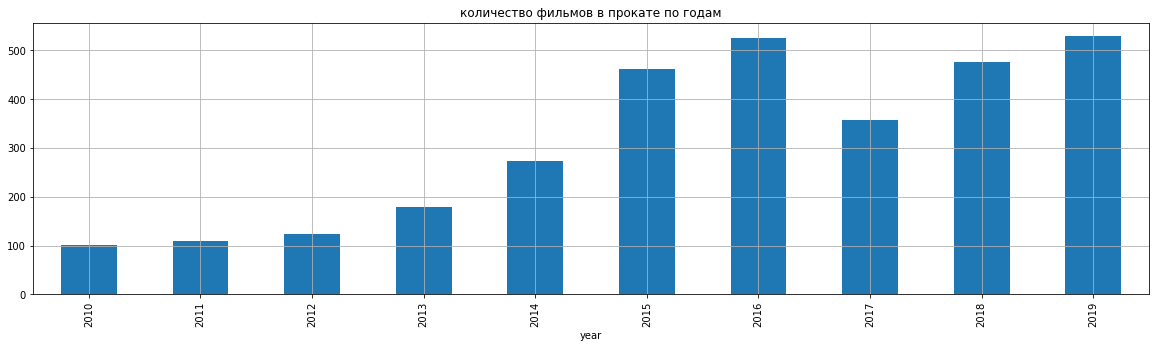

In [44]:
df_rent= data.loc[(data['box_office'] >0)].groupby('year')['box_office'].count() # число в прокате фильмов по годам.
print(df_rent)
df_rent.plot(title='количество фильмов в прокате по годам', kind='bar',figsize=(20, 5),grid = True);

Посчитаем, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах.

In [45]:
df_title = data.groupby('year')['title'].count() # число фильмов по годам.
print(df_title)
print(df_rent/df_title) # доля прокатов фильмов по годам

print('Доля фильмов, вышедших в прокат:', round(data['box_office'].notna().mean(),2))

year
2010    985
2011    622
2012    593
2013    630
2014    807
2015    705
2016    818
2017    505
2018    891
2019    930
Name: title, dtype: int64
year
2010    0.102538
2011    0.175241
2012    0.207420
2013    0.284127
2014    0.338290
2015    0.655319
2016    0.641809
2017    0.706931
2018    0.533109
2019    0.569892
dtype: float64
Доля фильмов, вышедших в прокат: 0.42


- Изучим, как менялась динамика проката по годам. В каком году сумма сборов была минимальной и максимальной.

Минимальная сумма сборов: 40.0
Максимальная сумма сборов: 3073568690.79


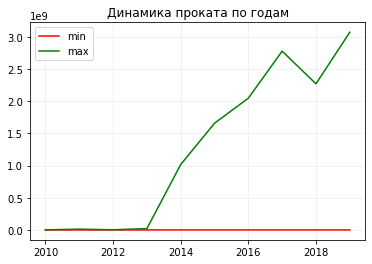

In [46]:
df = data.loc[data['box_office']>0]
print('Минимальная сумма сборов:', df['box_office'].min())
print('Максимальная сумма сборов:',df['box_office'].max())

y= df.groupby('year')['box_office'].min()
z= df.groupby('year')['box_office'].max()

# Код ревьюера: раскоментировать для магии
# plt.figure(figsize=(12, 6))

plt.plot(y, color='r', label='min')
plt.plot(z, color='g', label='max')
plt.grid(visible = True, color = '#eeeeee')
plt.title("Динамика проката по годам")
plt.legend()
plt.show()

В Графике видно, что с минимальные прокаты оставались на том же уровне на протяжении всех лет. А максимальные значения ведут интереснее, рассмотрим их поближе.

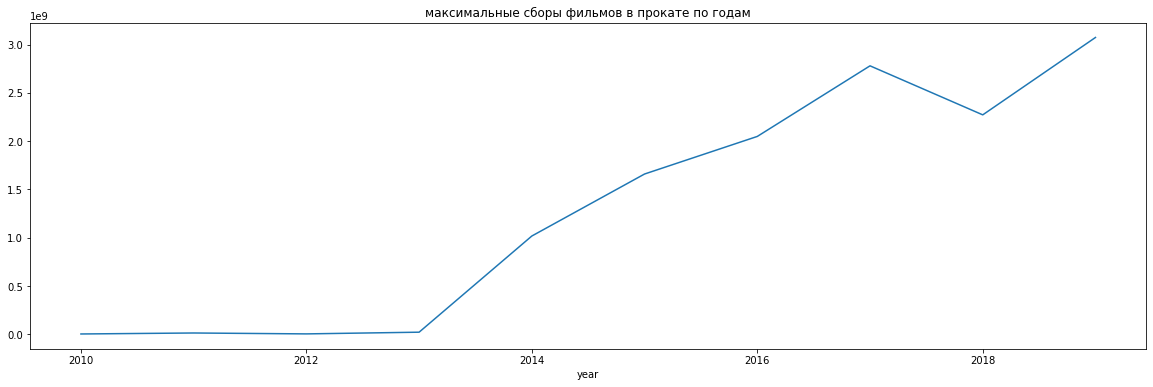

In [47]:
df.groupby('year')['box_office'].max().plot(title='максимальные сборы фильмов в прокате по годам', kind='line',figsize=(20, 6));

Динамики с 2010 по 2013 год почти не наблюдается. С 2013 года просматривается рост до 2017г, далее незначительный спад до 2018 и дальнейший рост до 2019

<AxesSubplot:title={'center':'максимальные сборы фильмов в прокате по годам'}, xlabel='year'>

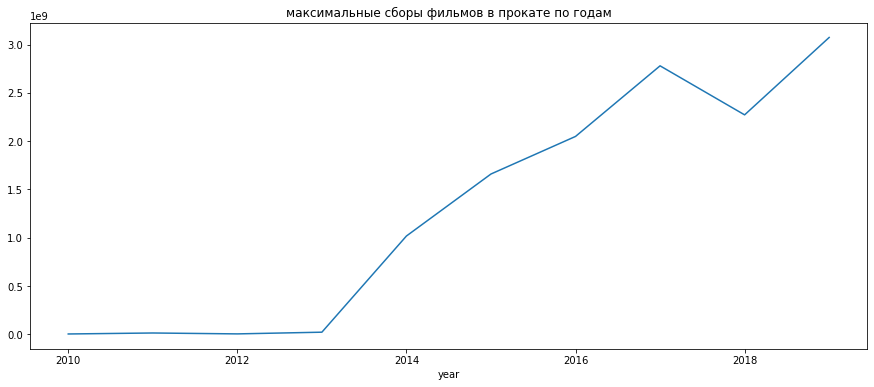

In [48]:
# код ревьюера
(df.groupby('year')['box_office']
   .max()
   .plot(title='максимальные сборы фильмов в прокате по годам', 
         kind='line',
         figsize=(15, 6)))

- С помощью сводной таблицы посчитаем среднюю и медианную сумму сборов для каждого года.

In [49]:
data_pivot =  data.pivot_table(index=['year'], values = 'box_office', aggfunc = {'mean','median'})
print(data_pivot)

              mean       median
year                           
2010  2.313004e+04     1700.000
2011  1.293832e+05     3000.000
2012  5.433924e+04     5660.000
2013  1.619549e+05     3522.500
2014  2.668442e+07    18160.000
2015  8.494057e+07  4920933.000
2016  9.100057e+07  3846679.410
2017  1.360328e+08  9968340.000
2018  1.045651e+08  8891102.210
2019  9.136926e+07  4627798.345


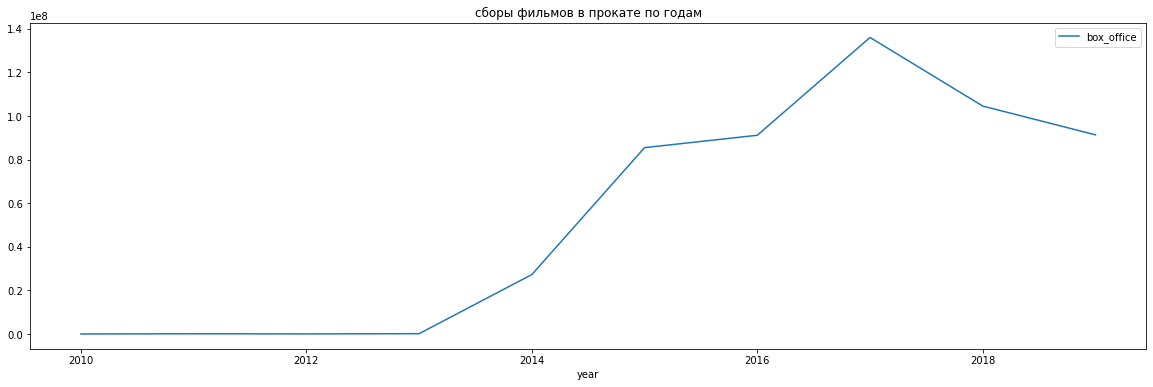

In [50]:
df.pivot_table(index=['year'], values = 'box_office', aggfunc = ('mean'))\
    .plot(title='сборы фильмов в прокате по годам', kind='line',figsize=(20, 6));

На графике отчетливо видно с 2010 до 2013 прокат фильмов был минимальным. Рост с 2013 до 2017. Пик в 2017. Далее шло на убыль и в 2019году покат вернулся к значению в 2016году. Явное отличие среднего значения от медийного обусловлено выбросами значений в таблице.

- Определим влияние возрастного ограничения аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год. Фильмы с каким возрастным ограничением собрали больше всего денег в прокате. Меняется ли картина в зависимости от года.

In [51]:
data['age_restriction'].unique()

array(['«18+» - запрещено для детей', '«6+» - для детей старше 6 лет',
       '«12+» - для детей старше 12 лет',
       '«16+» - для детей старше 16 лет',
       '«0+» - для любой зрительской аудитории'], dtype=object)

In [52]:
split_first('age_restriction', 'age_num',' -') # используем ранее созданную функцию "создания столбца с разделением символов".
data['age_num'] = data['age_num'].replace('«6+»', '«06+»') # исключаем "символьное" условие 6+ > 12+
display(data.head(3))

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,budget,financing_source,ratings,genres,box_office,year,first_producer,first_genres,perc_budget,age_num
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,0.0,...,0.0,NaN,7.2,"боевик,драма,мелодрама",NaN,2015,Дэвид Валдес,боевик,NaN,«18+»
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,0.0,...,0.0,NaN,6.6,"драма,военный",NaN,2016,NaN,драма,NaN,«06+»
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0.0,...,0.0,NaN,6.8,"фантастика,боевик,триллер",NaN,2016,Джим Лемли,фантастика,NaN,«18+»


Построим график зависимости сборов в прокате от ограничений по годам с 2015 по 2019г.

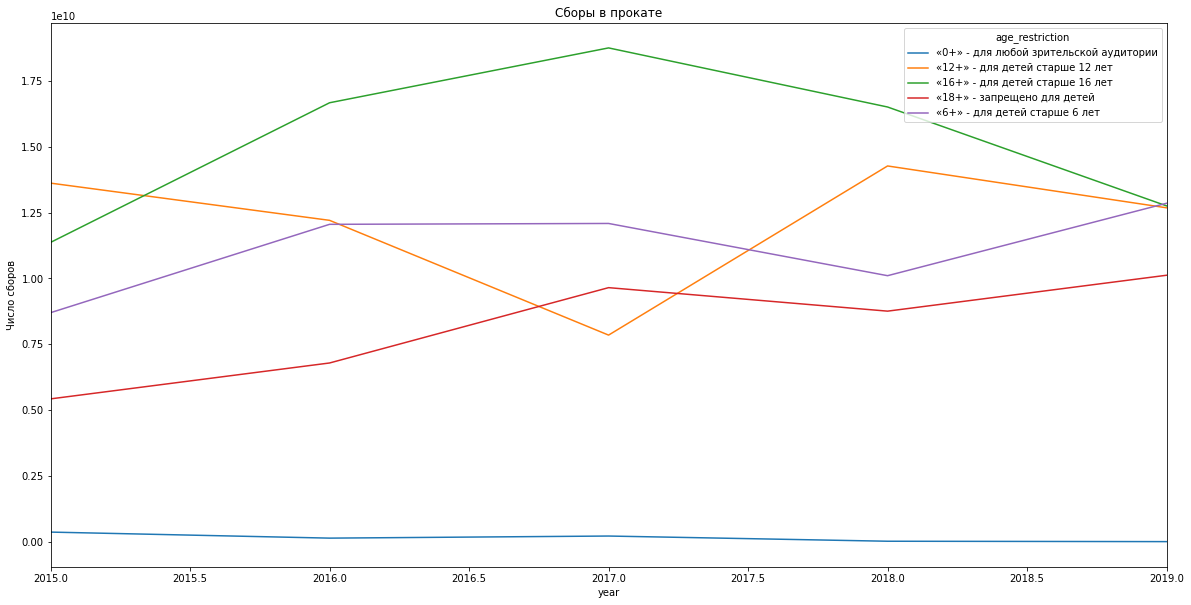

In [53]:
data[data['box_office'].notna()] \
    .pivot_table(index='year',
                columns='age_restriction',
                values='box_office',
                aggfunc='sum') \
    .plot(figsize = (20, 10), title = 'Сборы в прокате', ylabel = 'Число сборов', kind = 'line', xlim = [2015, 2019]);

Графики каждого ограничения по возрасту. Видно, как в разных годах предпочтения фильмов меняется. Стабильно смотрят фильмы "6+", а на фильмы категории "12+" и "16+" скаждым годом меняется. Можно выделить 2017 год. Люди ходили смотерть фильмы чаще, чем в остальных годах и больше смотрели фильмы "16+"и меньше "12+". В 2019 году прокаты фильмов сравнялись, кроме "18+". Про фильмы "18+" можно сказать, что спрос с течением лет рос. Возможно рост зависит от выхода продолжения долгожданного фильма, а панидение от плохих отзывов нового фильма.

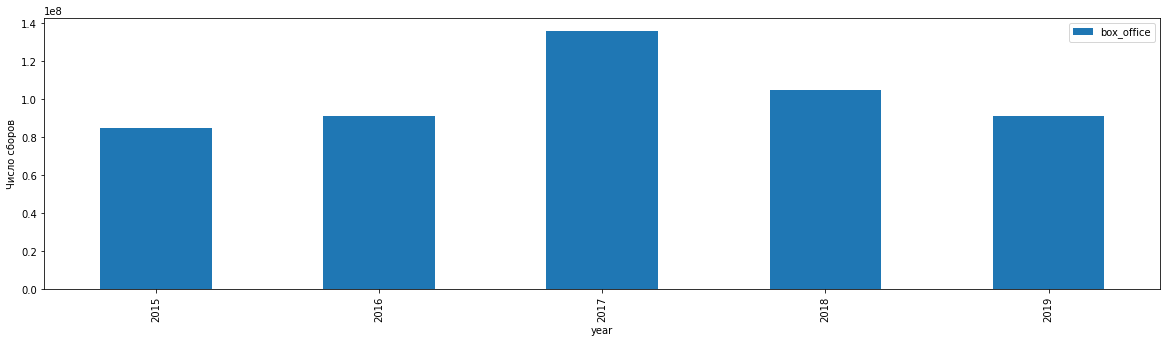

In [54]:
data.query('year >= 2015').pivot_table(index= 'year', values = 'box_office')\
    .plot(ylabel = 'Число сборов', kind = 'bar',figsize=(20, 5));


<AxesSubplot:xlabel='year', ylabel='box_office'>

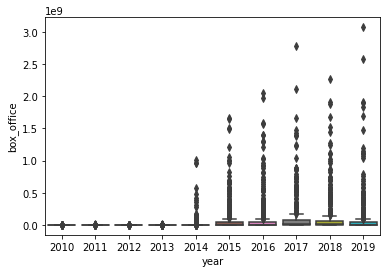

In [58]:
sns.boxplot(x='year', y='box_office', data=data)

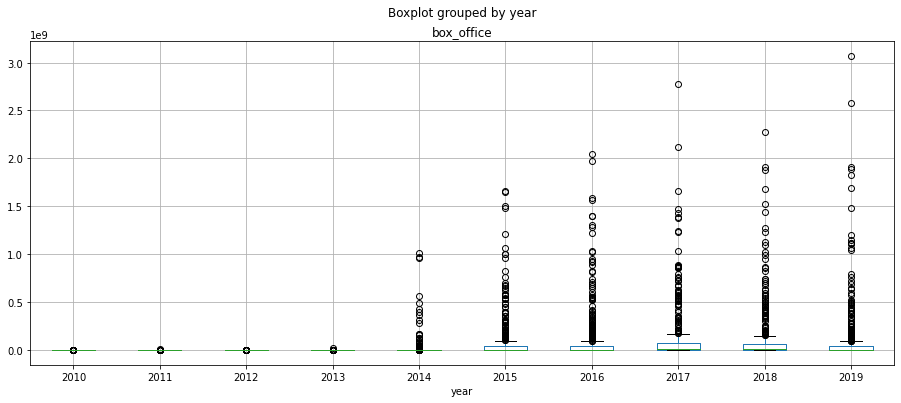

In [60]:
(data.query("box_office > 0")
     .boxplot(column="box_office", 
              by="year",
              figsize=(15, 6)));

По графику видно, что в 2017 больше всего было сборов. Меньше всего в 2015году.

Подведем итоги:  
Определили сколько фильмов выходило в прокат каждый год. в 2010 всего 101 фильм, зато в 2019 уже 540, а так же долю вышедших в прокат фильмов от снятых по годам. 10% в 2010, а уже в 2019 - 56%. Пик удачных фильмов был в 2017оду - целых 70%.  
Определили динамику максимальных сборов и минимальных по годам.   
С минимальными сборами все прозаично, приближенные к 0, а вот максимальные интереснее. с 2010 по 2013 год медленный рост, после рост до 2017 года. почти 2,7млн., далее спад до 2 к 2018, потом Рост до 2019 до 3млн.  
Посмотрели зависимости проката фильмов по ограничению по возрасту - самые восстребованные фильмы оказались 16+,а хуже всех продавались 18+.

## Исследуем фильмы, которые получили государственную поддержку


Создадим Датафрейм для исследования с условием гос поддержки.

In [ ]:
research = data[data['refundable_support'].notna() | df['nonrefundable_support'].notna()]
research['full_support'] = data['refundable_support'] + data['nonrefundable_support']

In [ ]:
research['first_genres'].value_counts().plot(title = 'Фильмы(по жарнам) имеющие гос поддержку',kind = 'bar',figsize = (20,5));

Охотнее инвестиционный коммитет по кинематографу выделяет деньги Драме.

In [ ]:
research.groupby('first_genres') \
            .agg('sum') \
            .sort_values(by = 'full_support', ascending = False) \
            .plot(title = 'Доли финансирования гос. поддержки', kind = 'bar',figsize = (20,5), stacked = True, 
                  y = ['refundable_support', 'nonrefundable_support']);

Как видно большая доля всего бюджета приходится на невозвратное финансирование.

In [ ]:
research[['first_genres','ratings']].groupby('first_genres') \
                                        .agg('mean') \
                                        .sort_values(by='ratings', ascending=False) \
                                        .plot(title='оценка фильмов по жанрам', kind='bar',figsize = (20,5));

Рейтинг фильмов-нуар за все время проката самый большой.  
Фильмы для взрослых - самый низкий рейтинг. (очень странно, что данные фильмы имеют гос поддержку). 

Для рентабильности фильмов применим предобработку:

In [ ]:
research['profit'] = (research['box_office'] / research['full_support']) -1
research['viable'] = research['profit'] > 0 # окупающиеся фильмы
research['not_viable'] = ~research['viable'] # неокупающиеся фильмы

In [ ]:
research.groupby('first_genres')\
        .agg({'title': 'count','viable': 'sum','not_viable': lambda x: 0 - x.sum()}) \
        .sort_values(by='title',ascending=False) \
        .plot(title='Количество окупающихся и неокупающихся фильмов', kind='bar', figsize = (20,5), stacked=True, grid = True,
        y=['viable', 'not_viable']);

Как видно на графике окупаемых фильмом намного меньше.

## Общий вывод

Предобработка данных.  
Обьединили обе таблицы по общему столбцу.  
Для этого привели таблицы к общему типу int.  
В первой таблице устранили пробел и  заменили некорректное значение и потом поменяли тип данных.  
Проверили типы данных в остальных колонках.  
Заменили пропуски значений в каждой колонке, проверили на дубликаты.  
Явные пропуски зависили от отсутствия гос. бюджета. Были заполнены по условиям и зависимостям.  
Созданы дополнительные столбцы для построения графиков и гистограмм.  

Исследовательский анализ данных.  
Провели анализ зависимостей:  
- Количество прокатов фильмов в год. в 2010 году всего 101 фильм, а в 2019 уже 530. Увидели динамику изменения по годам. Рост прокатов начался в 2013году, пик в 2017.
- Влияние ограничения по возрасту на прокат фильмов. Больше смотрели фильмов с ограничением 6+.  
Провели анализ фильмов с государственной поддерждкой.  
- Выделение буджетных средств. Охотнее выделялись гос. средства на драмы.
- Большая доля бюджета приходится на невозвратное финансирование.
- Рейтинг фильмов Нуар больше остальных. Минимальный рейтинг у фильмаов для взрослых.
- Рассмотрели окупаемость фильмов с гос поддержкой. Окупаемость небольшая. Больше в минус.

Резюмируя можно сказать:  
С каждым годом фильмов в прокат выходит больше. Охотнее смотрят фильмы 6+.  Фильмы с гос. поддержкой никто не любит.

Рекомендация:  
В исходной таблице нехватало данных для более точного анализа.  
Рекомендуется дополнительно сделать обязательными поля ввода финансирования гос. поддержки, рейтинга и жанра.
